In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\DELL\AIandML\python programs\19-6-2020\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# creating a new column
df['family'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
df1=pd.read_csv(r"C:\Users\DELL\AIandML\python programs\18-6-2020\titanic.csv")

In [8]:
df.family.describe()


count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: family, dtype: float64

In [9]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [10]:
#Based on the catagories , we will analyze which category people were more likely to survive
## low,mid,mid-high,high
df['Fare_category'] = pd.cut(df.Fare,bins = [0,7.9,14.45,31.00,512],
                            labels= ['low','mid','mid-high','high'])
df['Fare_category'].head()

0     low
1    high
2     mid
3    high
4     mid
Name: Fare_category, dtype: category
Categories (4, object): [low < mid < mid-high < high]

In [11]:
df[['Fare','Fare_category']]

,Fare,Fare_category
0,7.2500,low
1,71.2833,high
2,7.9250,mid
3,53.1000,high
4,8.0500,mid
...,...,...
886,13.0000,mid
887,30.0000,mid-high
888,23.4500,mid-high
889,30.0000,mid-high


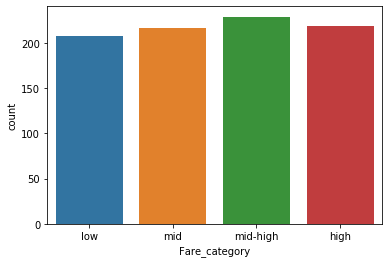

In [12]:
## visualize the fair category
##countplot to give you entrie count of the category--.categories of survived and decreased\
sns.countplot(x='Fare_category',data=df)

###### Observations: From the graph above we can see that the Mid-High class people are in the category approx above 200 where as Mid and High are below 200 (approx)

Text(0.5, 1.0, 'Survival based on Fare Category')

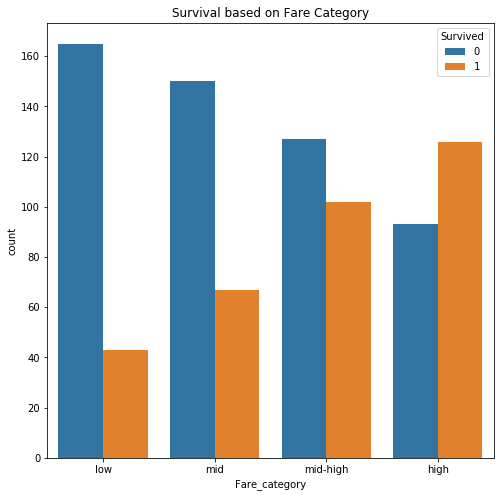

In [13]:
## Visualize the Fare Category
plt.figure(figsize=(8,8))
sns.countplot(x='Fare_category',hue='Survived', data=df).\
            set_title('Survival based on Fare Category')

In [14]:
## Embarked:port-->from which passenger hd boarded the ship
df.Embarked.value_counts()##out of 100%passenger , which port has taken care

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

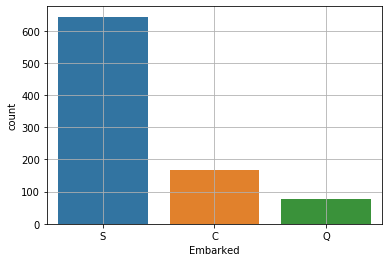

In [16]:
# visualizing the port column
sns.countplot(x='Embarked',data=df)
plt.grid()

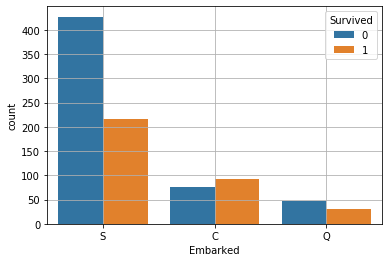

In [17]:
# visualizing the port column
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.grid()

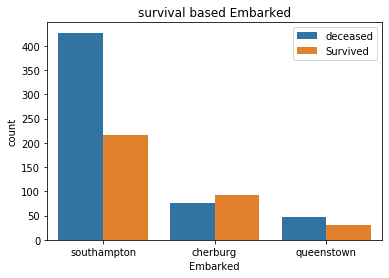

In [18]:
## visualizing the port colun, s---
p=sns.countplot(x='Embarked',hue='Survived',data=df)
p.set_xticklabels(['southampton','cherburg','queenstown'])
p.set_title('survival based Embarked')
p.legend(labels=['deceased','Survived'])

In [19]:
## importing with the mising valuews
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_category    0.020202
Embarked         0.002245
family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [20]:
##cabin-->77%missing values values , we are going a new category as NA
df.Cabin.fillna('NA',inplace=True)

In [21]:
df.Cabin.head()

0      NA
1     C85
2      NA
3    C123
4      NA
Name: Cabin, dtype: object

In [22]:
df.Cabin.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Cabin, Length: 891, dtype: bool

In [23]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [24]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
##median-->sorting in the order (middle value )Nan in the age column shouldd be substituted with median of ge
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

In [26]:
## imputing the Embarked column ---->Mode Iputation
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [27]:
## imputing the fare category column
df.Fare_category.isnull().sum()

18

In [28]:
df.Fare_category.fillna(df.Fare_category.mode()[0],inplace=True)
df.Fare_category.isnull().sum()

0

In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
family           0
Fare_category    0
dtype: int64

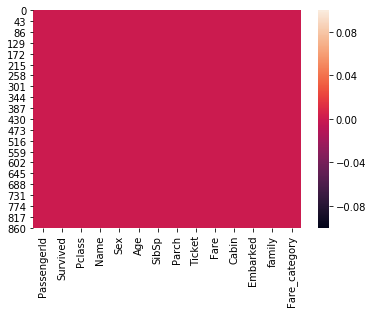

In [30]:
sns.heatmap(df.isnull())

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,high
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,high
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,mid


In [32]:
df['Age-Range']=pd.cut(df.Age,[0,10,20,30,40,60,80])
df[['Age','Age-Range']].head()


,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [33]:
## encoding of categorical variables / columns
# when ever we are creating dummy columns,we need to drop the one dummy column 
dummy_set=pd.get_dummies(df.Fare_category,drop_first=True)# n columns we neeed to inculse upto n-1 dummy columns
dummy_set
#1-- represents presence of category
#0--> represents abscence of category

Fare_category,mid,mid-high,high
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
886,1,0,0
887,0,1,0
888,0,1,0
889,0,1,0


In [34]:
## encoding of categorical variables / columns
dummy_set=pd.get_dummies(df.Fare_category,drop_first=True)# n columns we neeed to inculse upto n-1 dummy columns

dummy_set.head()

Fare_category,mid,mid-high,high
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [35]:
df=pd.concat([df,dummy_set],axis=1)

In [36]:
## encoding of categorical varaiables / columns
df=pd.concat([df,pd.get_dummies(df.Cabin,prefix='cabin',drop_first=True),
               pd.get_dummies(df.Embarked,prefix='Emb',drop_first=True),
               pd.get_dummies(df.Fare_category,prefix='Fare',drop_first=True),
                pd.get_dummies(df['Age-Range'],drop_first=True)],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_mid,Fare_mid-high,Fare_high,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [37]:
# encoding the sex column 
from sklearn.preprocessing import LabelEncoder
df['sex']=LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_S,Fare_mid,Fare_mid-high,Fare_high,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]",sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,0,0,0,0,1,0,0,1


In [38]:

df.columns


Index([  'PassengerId',      'Survived',        'Pclass',          'Name',
                 'Sex',           'Age',         'SibSp',         'Parch',
              'Ticket',          'Fare',
       ...
               'Emb_S',      'Fare_mid', 'Fare_mid-high',     'Fare_high',
              (10, 20],        (20, 30],        (30, 40],        (40, 60],
              (60, 80],           'sex'],
      dtype='object', length=176)

In [40]:
# droping the unnecessary columns
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Fare_category','cabin','Age-Range'],axis=1,inplace=True)
df.shape

KeyError: "['cabin'] not found in axis"

In [41]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_S,Fare_mid,Fare_mid-high,Fare_high,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]",sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,0,0,0,0,1,0,0,1


In [42]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
                ...  
(20, 30]        uint8
(30, 40]        uint8
(40, 60]        uint8
(60, 80]        uint8
sex             int32
Length: 176, dtype: object

In [43]:
## satandardscaler--notrequired for the (distancebased)

In [44]:
# seperating the input and output data ,dropping the survived column from the data
x=df.drop('Survived',axis=1)
x.shape

(891, 175)

In [45]:
## output column
y=df.iloc[:0]
y.shape

(0, 176)

In [46]:
## input and out put into training data and testing data 
## training -->we will be training the model on training data
## testing ---> chesck the performance of the model
## 891--->out ,75% of 891 rowas will be in training data set and 25% of rows will be in testing data

In [47]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25)

ValueError: Found input variables with inconsistent numbers of samples: [891, 0]

In [48]:
print(x_train.shape)

NameError: name 'x_train' is not defined